# Scaling Exercises

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

In [2]:
train, validate, test = pd.read_csv('train.csv', index_col=0), pd.read_csv('validate.csv', index_col=0), pd.read_csv('test.csv', index_col=0)


In [3]:
train.shape

(1038959, 7)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038959 entries, 10057 to 843328
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1038959 non-null  float64
 1   bathrooms   1038959 non-null  float64
 2   area        1038959 non-null  float64
 3   tax_value   1038959 non-null  float64
 4   year_built  1038959 non-null  float64
 5   taxamount   1038959 non-null  float64
 6   fips        1038959 non-null  float64
dtypes: float64(7)
memory usage: 63.4 MB


### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [5]:
# do the thing

In [9]:
train_scaled = train.copy()

In [10]:
# make, fit, use:
columns_to_scale = ['bedrooms', 'bathrooms','tax_value']
# make the object, put it into the variable scaler
scaler = MinMaxScaler()
# fit the object to my data:
train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [7]:
train.columns

Index(['bedrooms', 'bathrooms', 'area', 'tax_value', 'year_built', 'taxamount',
       'fips'],
      dtype='object')

In [11]:
train_scaled.head(2)

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
10057,0.666667,0.333333,1561.0,0.261030,1973.0,2504.40,6059.0
2004970,0.333333,0.333333,1770.0,0.092929,1960.0,1671.93,6037.0


Text(0, 0.5, 'Count')

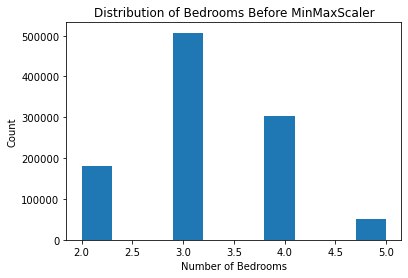

In [12]:
plt.hist(train.bedrooms)
plt.title('Distribution of Bedrooms Before MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

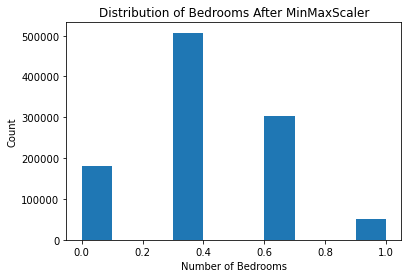

In [13]:
plt.hist(train_scaled.bedrooms)
plt.title('Distribution of Bedrooms After MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

In [14]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()
#    return fig, axs

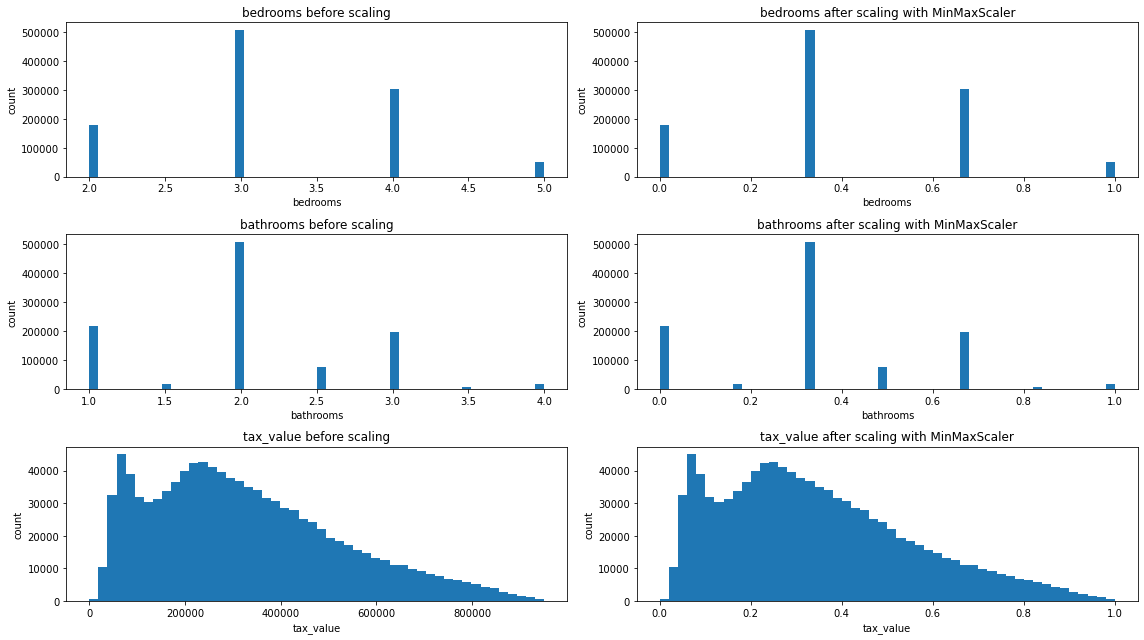

In [15]:
# MinMaxScaler Applied
visualize_scaler(scaler=MinMaxScaler(), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

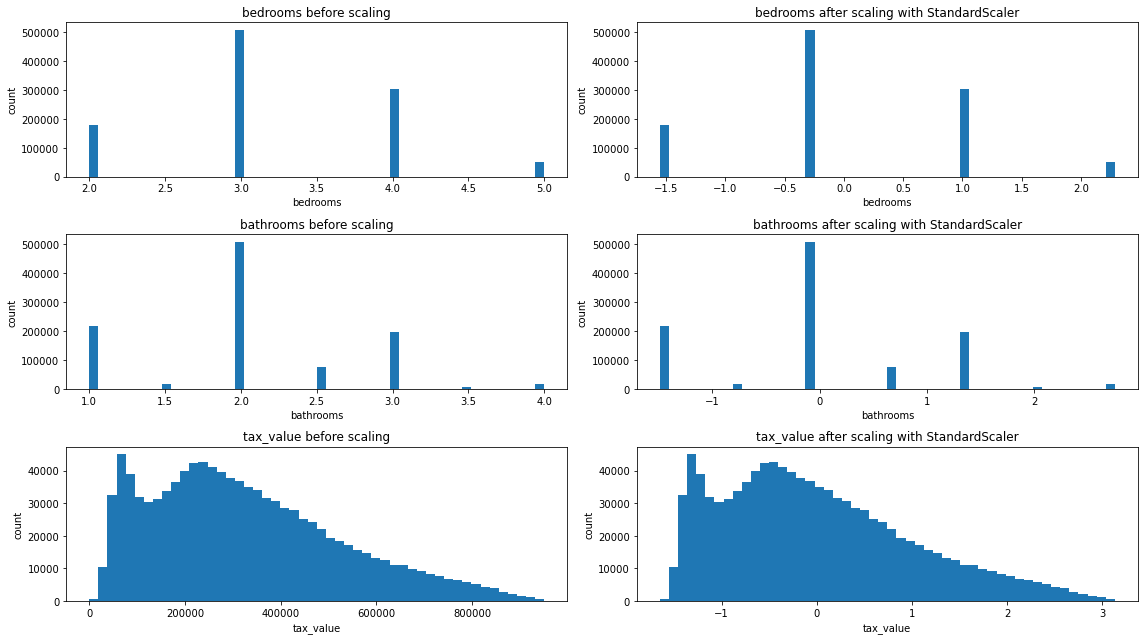

In [16]:
# StandardScaler Applied
visualize_scaler(scaler=StandardScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

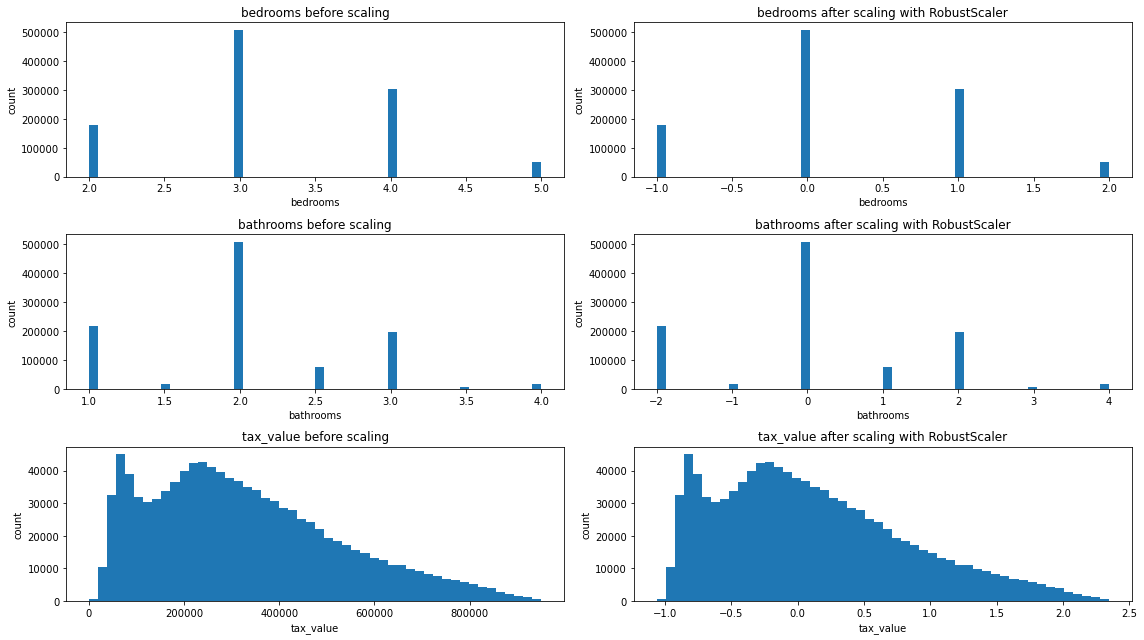

In [17]:
# RobustScaler Applied
visualize_scaler(scaler=RobustScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

### 2. Apply the `.inverse_transform` method to your scaled data. Is the resulting dataset the exact same as the original data?

In [18]:
scaler = MinMaxScaler()
original_data = train[['tax_value']]
scaled_data = scaler.fit_transform(original_data)

In [20]:
scaled_data[:5]

array([[0.26102987],
       [0.09292915],
       [0.08533543],
       [0.12530208],
       [0.45455654]])

In [21]:
original_data[:5]

,tax_value
10057,248240.0
2004970,88390.0
306031,81169.0
1038595,119174.0
270959,432268.0


In [22]:
scaler.inverse_transform(scaled_data)[:5]

array([[248240.],
       [ 88390.],
       [ 81169.],
       [119174.],
       [432268.]])

### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

**From sklearn.preprocessing.QuantileTransformer documentation:**

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

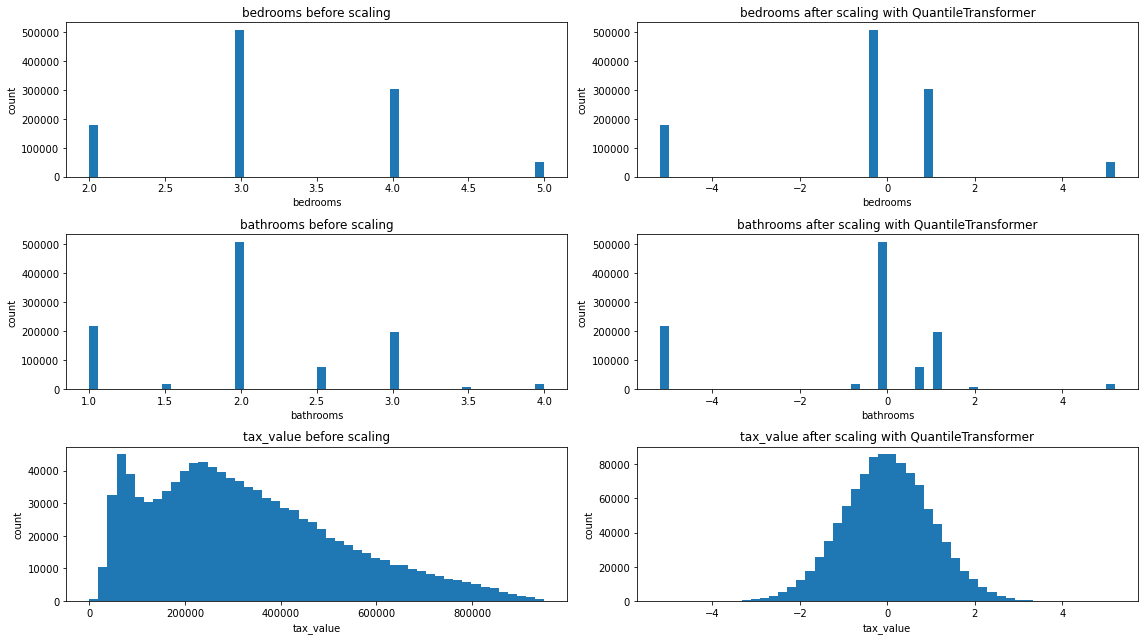

In [23]:
# QuantileTransformer Applied
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), 
                 df=train,
                 columns_to_scale=columns_to_scale, 
                 bins=50)

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

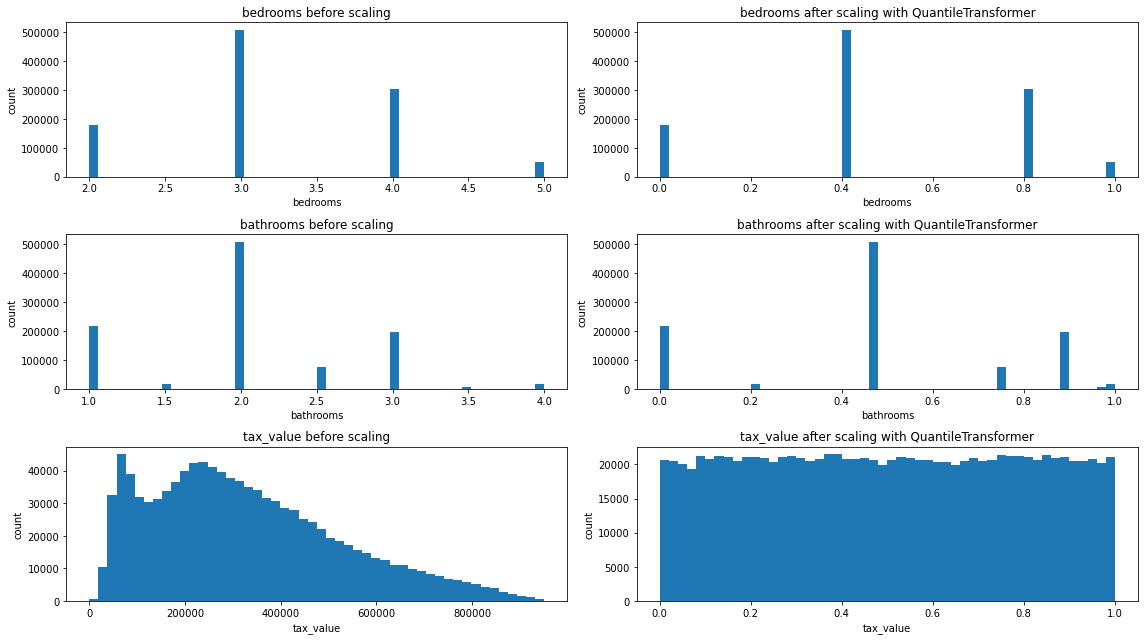

In [24]:
# QuantileTransformer Applied
visualize_scaler(scaler=QuantileTransformer(), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

### Creating a Pipeline Function

In [25]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['bedrooms', 'bathrooms', 'tax_value'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = MinMaxScaler()
    #     fit the thing
    scaler.fit(train[columns_to_scale])
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [26]:
scaler, train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, return_scaler=True)

In [27]:
train_scaled

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
10057,0.666667,0.333333,1561.0,0.261030,1973.0,2504.40,6059.0
2004970,0.333333,0.333333,1770.0,0.092929,1960.0,1671.93,6037.0
306031,0.000000,0.000000,1452.0,0.085335,1946.0,1310.88,6037.0
1038595,0.333333,0.000000,1000.0,0.125302,1950.0,1900.28,6037.0
270959,0.333333,0.333333,1974.0,0.454557,1988.0,5315.27,6037.0
...,...,...,...,...,...,...,...
991122,0.333333,0.000000,1199.0,0.295330,1951.0,3282.40,6111.0
1707759,0.666667,0.333333,1859.0,0.099889,1961.0,1463.61,6037.0
1770246,0.333333,0.666667,2132.0,0.166626,1980.0,2037.38,6037.0
1500741,0.000000,0.000000,780.0,0.501773,1955.0,6509.69,6037.0


In [ ]:
validate_scaled

In [ ]:
test_scaled